# Importing all required file

In [107]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Conv2D, Input, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError


# Loading Dataset (Kaggle - Image Super Resolution)

In [2]:
train_high_res_dir = 'dataset/train/high_res'
train_low_res_dir = 'dataset/train/low_res'

def load_images(img_dir, img_size):
    images = []
    for img_file in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_file)
        img = load_img(img_path, target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

img_size=128
high_res_images = load_images(train_high_res_dir, 128)
low_res_images = load_images(train_low_res_dir, 128)


# creating model 1 using ReLU Activation function

In [3]:
def create_model(img_size):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
    
    model.add(UpSampling2D((2, 2)))
    rel
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    
    model.add(UpSampling2D((2, 2))) 
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    model.add(MaxPooling2D((2, 2))) 
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same')) 
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model = create_model(img_size)
model.summary()


C:\Users\Jay Sonawane\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,819 (1.14 MB)

 Trainable params: 298,819 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

# creating model 2 using tanh Activation function

In [4]:
def create_model(img_size):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='tanh', padding='same', input_shape=(img_size, img_size, 3)))
    
    model.add(UpSampling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='tanh', padding='same'))
    
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
    
    model.add(UpSampling2D((2, 2))) 
    
    model.add(Conv2D(128, (3, 3), activation='tanh', padding='same'))
    
    model.add(MaxPooling2D((2, 2))) 
    
    model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
    
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same')) 
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model_2 = create_model(img_size)

model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,819 (1.14 MB)

 Trainable params: 298,819 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

# creating model 3 using softplus Activation function

In [5]:
def create_model(img_size):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='softplus', padding='same', input_shape=(img_size, img_size, 3)))
    
    model.add(UpSampling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='softplus', padding='same'))
    
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='softplus', padding='same'))
    
    model.add(UpSampling2D((2, 2))) 
    
    model.add(Conv2D(128, (3, 3), activation='softplus', padding='same'))
    
    model.add(MaxPooling2D((2, 2))) 
    
    model.add(Conv2D(64, (3, 3), activation='softplus', padding='same'))
    
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same')) 
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model_3 = create_model(img_size)

model_3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,819 (1.14 MB)

 Trainable params: 298,819 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

# Trainging model 1

In [6]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(low_res_images, high_res_images, test_size=0.2, random_state=42)

# Train the model
epochs = 20
batch_size = 16

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

model_1_loss = history.history['loss']
model_1_val_loss = history.history['val_loss']

model.save("model_1_tanh.h5")
print("Model saved as 'model_1_tanh.h5'")

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 473s 13s/step - loss: 0.0690 - val_loss: 0.0100
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 470s 13s/step - loss: 0.0093 - val_loss: 0.0054
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 335s 9s/step - loss: 0.0053 - val_loss: 0.0042
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 502s 14s/step - loss: 0.0039 - val_loss: 0.0030
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 502s 14s/step - loss: 0.0029 - val_loss: 0.0034
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 465s 13s/step - loss: 0.0031 - val_loss: 0.0023
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 317s 9s/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - loss: 0.0019 - val_loss: 0.0017
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - loss: 0.0018 - val_loss: 0.0024
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - loss: 0.0018 - val_loss: 0.0020
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - loss: 0.0017 - val_loss: 0.0016
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - loss

# Trainging model 2

In [9]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(low_res_images, high_res_images, test_size=0.2, random_state=42)

# Train the model
epochs = 20
batch_size = 16

history = model_2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


# Save the model to a file
model_2.save("model_2_tanh.h5")
print("Model saved as 'model_2_tanh.h5'")


model_2_loss = history.history['loss']
model_2_val_loss = history.history['val_loss']


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - loss: 0.0052 - val_loss: 0.0044
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - loss: 0.0044 - val_loss: 0.0042
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - loss: 0.0040 - val_loss: 0.0036
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - loss: 0.0037 - val_loss: 0.0034
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - loss: 0.0035 - val_loss: 0.0031
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - loss: 0.0034 - val_loss: 0.0030
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - loss: 0.0036 - val_loss: 0.0032
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - loss: 0.0032 - val_loss: 0.0027
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - loss: 0.0028 - val_loss: 0.0031
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - loss: 0.0031 - val_loss: 0.0027
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - loss: 0.0

# Trainging model 3

In [10]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(low_res_images, high_res_images, test_size=0.2, random_state=42)

# Train the model
epochs = 20
batch_size = 16

history = model_3.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Save the model to a file
model_3.save("model_2_tanh.h5")
print("Model saved as 'model_3_tanh.h5'")


model_3_loss = history.history['loss']
model_3_val_loss = history.history['val_loss']


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - loss: 0.1794 - val_loss: 0.0801
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - loss: 0.0817 - val_loss: 0.0388
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - loss: 0.0285 - val_loss: 0.0159
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step - loss: 0.0159 - val_loss: 0.0153
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - loss: 0.0135 - val_loss: 0.0127
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - loss: 0.0128 - val_loss: 0.0129
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - loss: 0.0120 - val_loss: 0.0120
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - loss: 0.0122 - val_loss: 0.0120
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - loss: 0.0116 - val_loss: 0.0118
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - loss: 0.0118 - val_loss: 0.0112
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - loss: 0.0109 - val_loss: 0.0110
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 168s 5s/step - loss: 0.0

# Displaying results based on previous images

In [15]:
def display_results(low_res, high_res, preds, num_images=5):
    plt.figure(figsize=(15,15))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(low_res[i])
        plt.axis("off")
        plt.title("Low Resolution")
        
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(high_res[i])
        plt.axis("off")
        plt.title("High Resolution")
        
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(preds[i])
        plt.axis("off")
        plt.title("Prediction")

    plt.show()

Model - 1
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 750ms/step


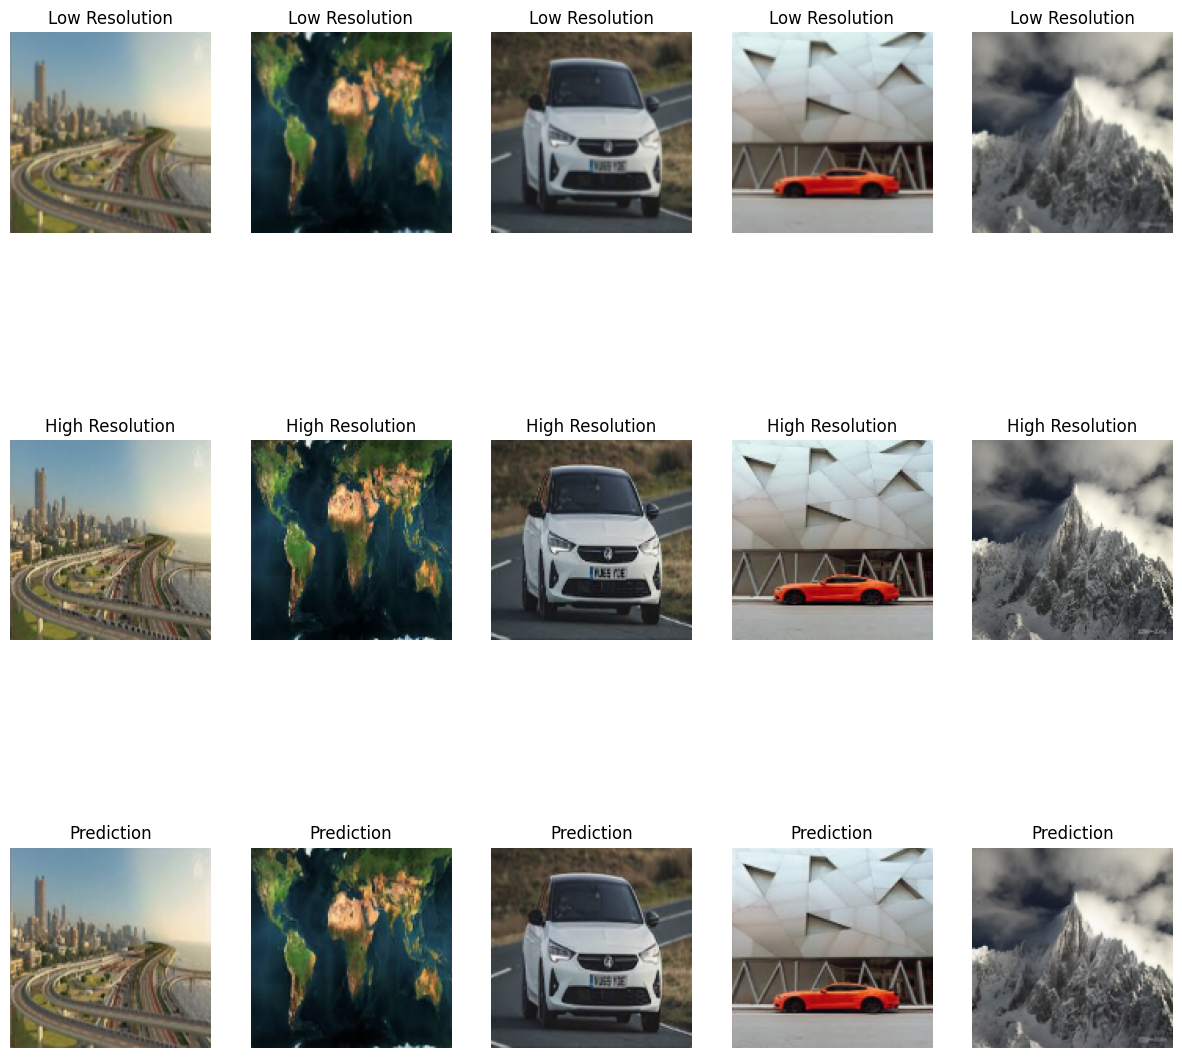

In [16]:
print("Model - 1")
val_preds_1 = model.predict(x_val)
display_results(x_val, y_val, val_preds_1)

Model - 2
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 794ms/step


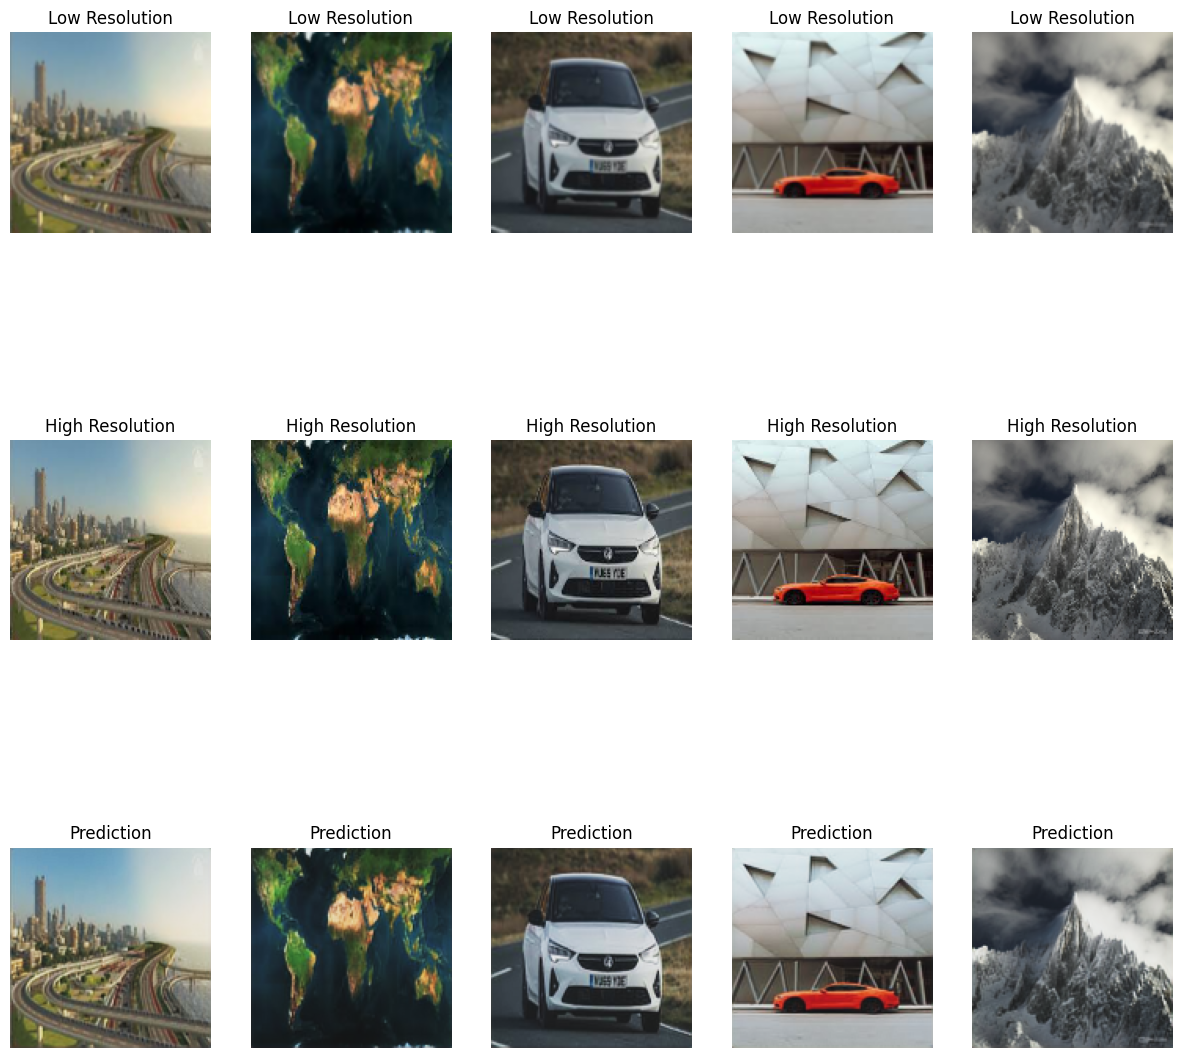

In [17]:
print("Model - 2")
val_preds_2 = model_2.predict(x_val)
display_results(x_val, y_val, val_preds_2)

Model - 3
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 843ms/step


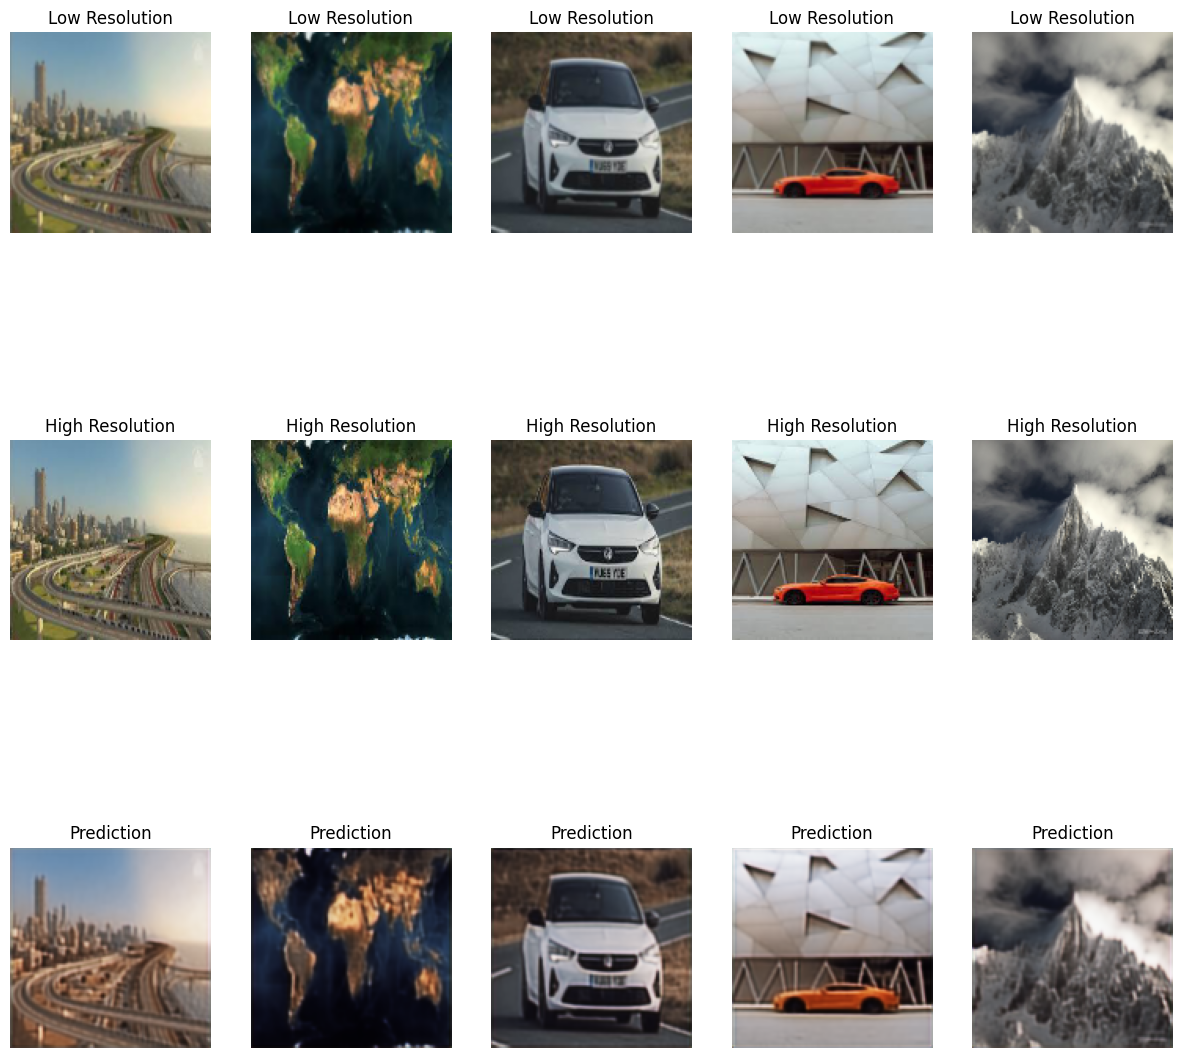

In [18]:
print("Model - 3")
val_preds_3 = model_3.predict(x_val)
display_results(x_val, y_val, val_preds_3)

# Visulations

In [19]:
# AT FIRST RUN

# model_1_loss = [0.0690, 0.0093, 0.0053, 0.0039, 0.0029, 0.0031, 0.0024, 0.0019, 0.0018, 0.0018, 0.0017, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0017, 0.0014, 0.0016, 0.0013]
# model_1_val_loss = [0.0100, 0.0054, 0.0042, 0.0030, 0.0034, 0.0023, 0.0018, 0.0017, 0.0024, 0.0020, 0.0016, 0.0015, 0.0014, 0.0014, 0.0013, 0.0014, 0.0014, 0.0014, 0.0014, 0.0012]

# model_2_loss = [0.0052, 0.0044, 0.0040, 0.0037, 0.0035, 0.0034, 0.0036, 0.0032, 0.0030, 0.0028, 0.0031, 0.0028, 0.0028, 0.0029, 0.0028, 0.0028, 0.0025, 0.0027, 0.0029, 0.0026]
# model_2_val_loss = [0.0044, 0.0042, 0.0036, 0.0034, 0.0031, 0.0030, 0.0032, 0.0027, 0.0027, 0.0031, 0.0027, 0.0026, 0.0028, 0.0025, 0.0032, 0.0027, 0.0025, 0.0024, 0.0024, 0.0022]

# model_3_loss = [0.1794, 0.0817, 0.0285, 0.0159, 0.0135, 0.0128, 0.0120, 0.0122, 0.0116, 0.0118, 0.0109, 0.0112, 0.0111, 0.0096, 0.0084, 0.0052, 0.0046, 0.0044, 0.0043, 0.0043]
# model_3_val_loss = [0.0801, 0.0388, 0.0159, 0.0153, 0.0127, 0.0129, 0.0120, 0.0120, 0.0118, 0.0112, 0.0110, 0.0108, 0.0122, 0.0110, 0.0051, 0.0043, 0.0040, 0.0042, 0.0041, 0.0041]


In [32]:
def plot_graph(loss, validation_loss, model_name):
    epochs = list(range(1, len(loss) + 1))  
    
    plt.figure(figsize=(10, 6)) 
    plt.plot(epochs, loss, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs, validation_loss, label='Validation Loss', color='orange', marker='s') 

    # Add labels and title
    plt.title('Training and Validation Loss Over Epochs ' + model_name , fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    # Add legend and grid
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='-', alpha=0.6)
    
    plt.xticks(range(1, len(loss) + 1)) 
    
    plt.show()

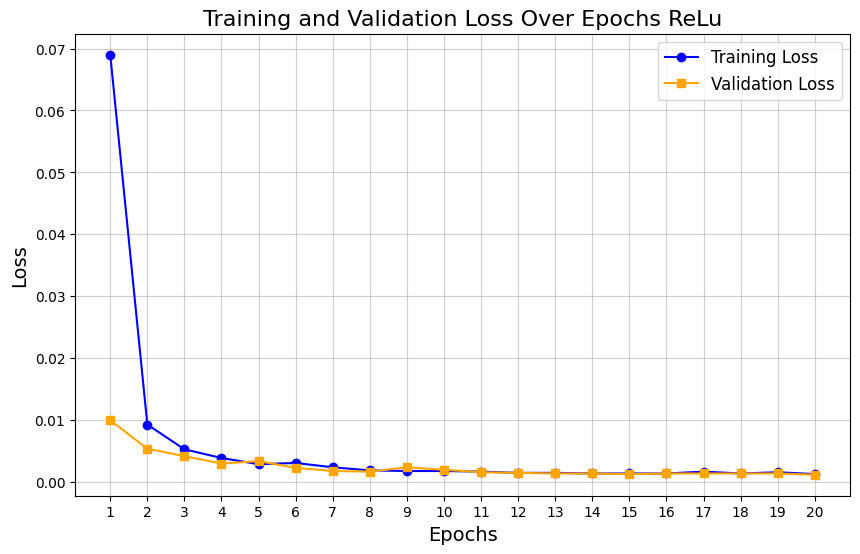

In [33]:
plot_graph(model_1_loss, model_1_val_loss, "ReLu")

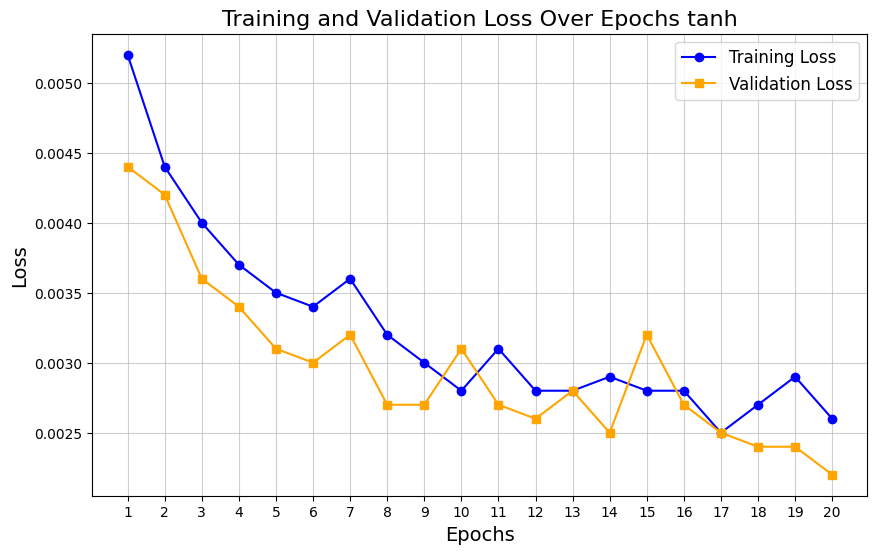

In [34]:
plot_graph(model_2_loss, model_2_val_loss, "tanh")

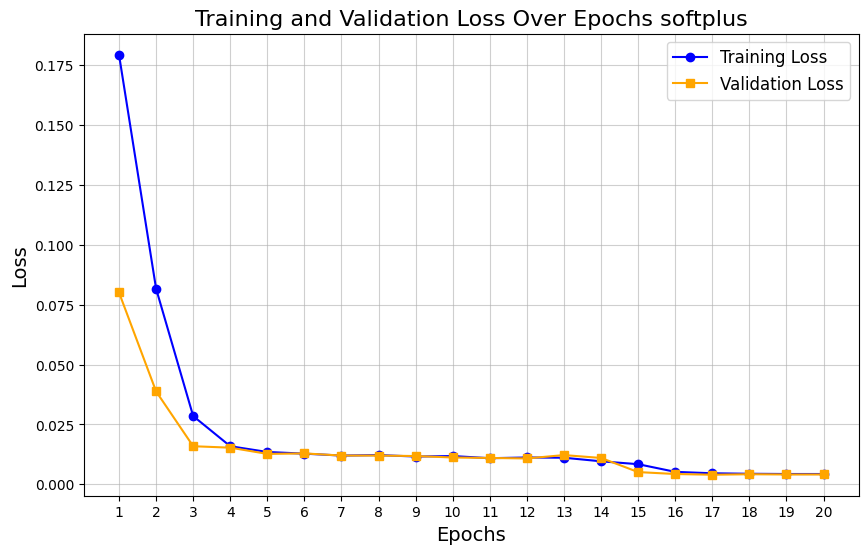

In [36]:
plot_graph(model_3_loss, model_3_val_loss, "softplus")

In [37]:
def plot_three_losses(relu_loss, tanh_loss, softplus_loss):
    epochs = list(range(1, len(relu_loss) + 1)) 
    
    plt.figure(figsize=(12, 8)) 
    
    plt.plot(epochs, relu_loss, label='ReLU Loss', color='blue', marker='o', linestyle='-')
    plt.plot(epochs, tanh_loss, label='Tanh Loss', color='green', marker='s', linestyle='--')
    plt.plot(epochs, softplus_loss, label='Softplus Loss', color='red', marker='^', linestyle='-.')

    plt.title('Comparison of Losses: ReLU, Tanh, and Softplus', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.xticks(range(1, len(relu_loss) + 1))  
    
    plt.show()

Loss Comparision of all functions


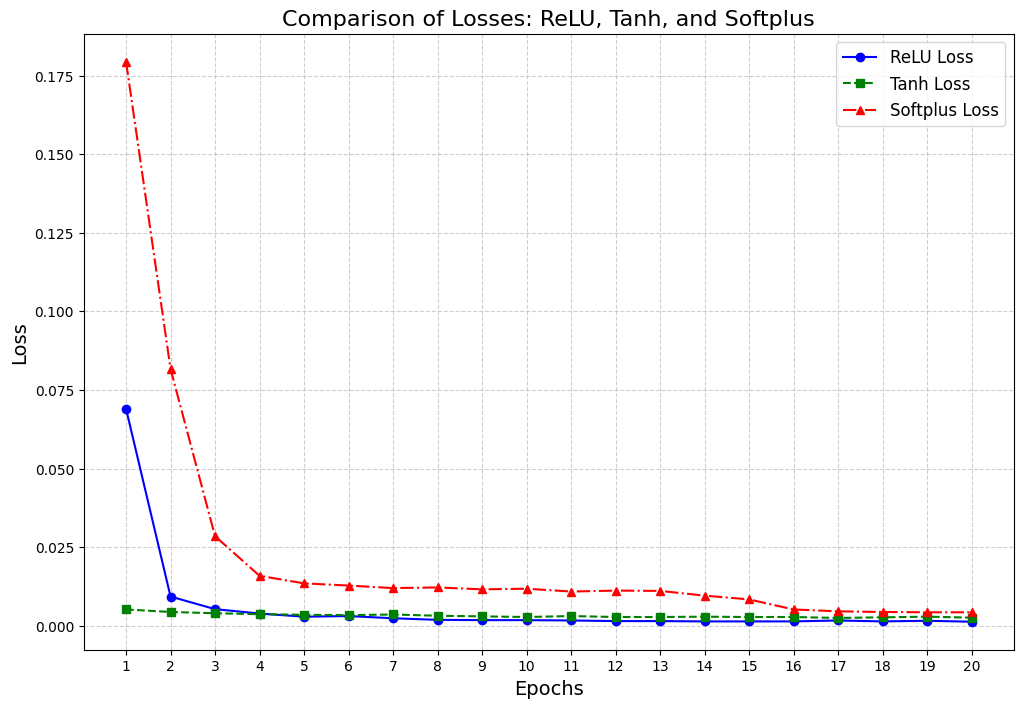

In [39]:
print("Loss Comparision of all functions")
plot_three_losses(model_1_loss,model_2_loss,model_3_loss)

Validation Loss Comparision of all functions


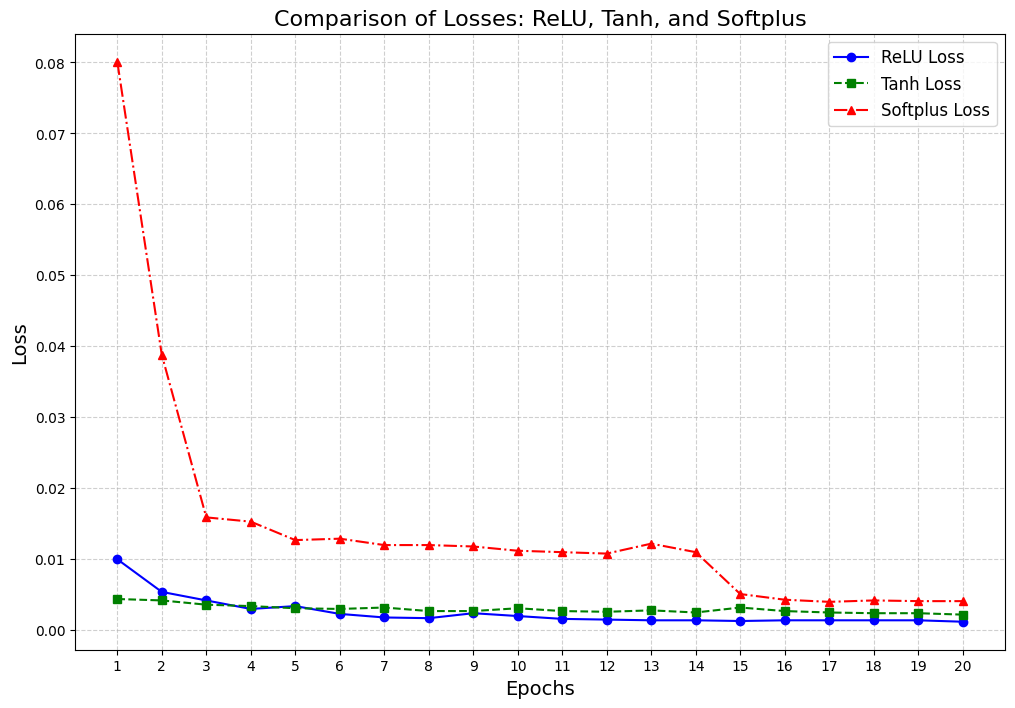

In [40]:
print("Validation Loss Comparision of all functions")
plot_three_losses(model_1_val_loss,model_2_val_loss,model_3_val_loss)

# Testing Over random Pictues

In [108]:
def enhance_image(image_path, img_size=224):  # Default image size set to 224
    img = Image.open(image_path)
    img = img.resize((img_size, img_size))  # Resize the image
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    plt.figure(figsize=(20, 20))
    plt.subplot(3,1,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Original Image")

    models = [
        load_model('model_1_relu.h5', custom_objects={'mse': MeanSquaredError()}),
        load_model('model_2_tanh.h5', custom_objects={'mse': MeanSquaredError()}),
        load_model('model_3_softplus.h5', custom_objects={'mse': MeanSquaredError()})
    ]

    for i, model in enumerate(models):
        # Predict enhanced image
        enhanced_img_array = model.predict(img_array)[0]
        enhanced_img = array_to_img(enhanced_img_array)
        plt.figure(figsize=(20, 20))
        plt.subplot(3,1,i+1)
        plt.imshow(enhanced_img)
        plt.axis("off")
        plt.title(f"Enhanced Image - Model {i + 1}")
        plt.show()
# 3, num_images, i + 1



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


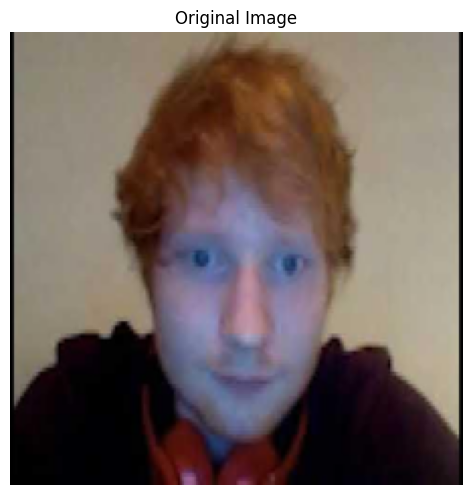

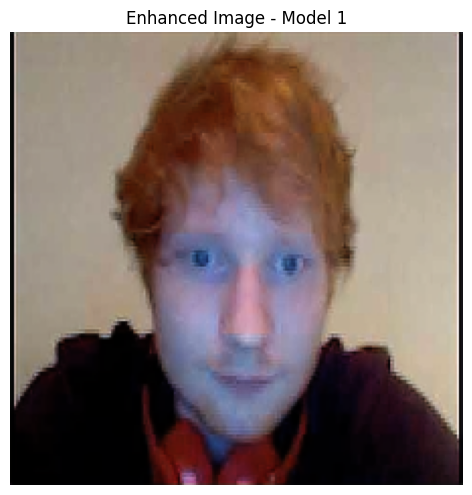

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


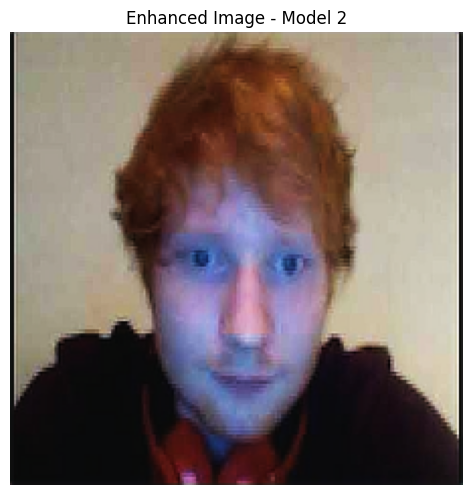

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


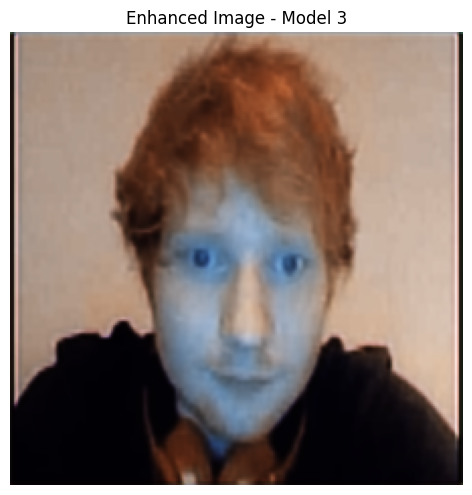

In [104]:
enhance_image('trial_2.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


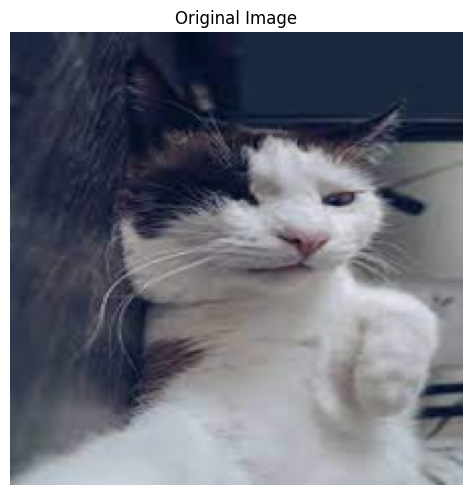

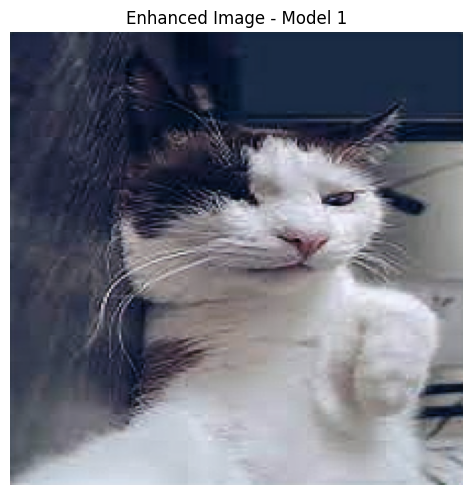

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


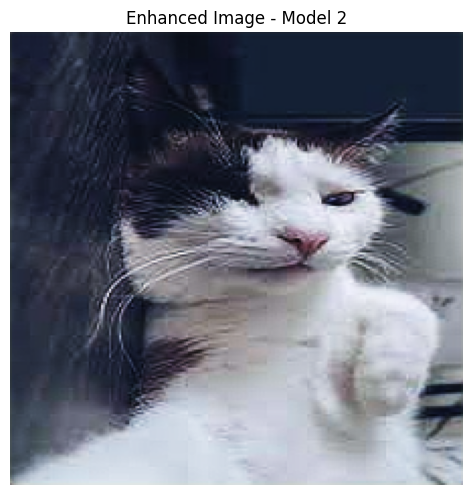

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


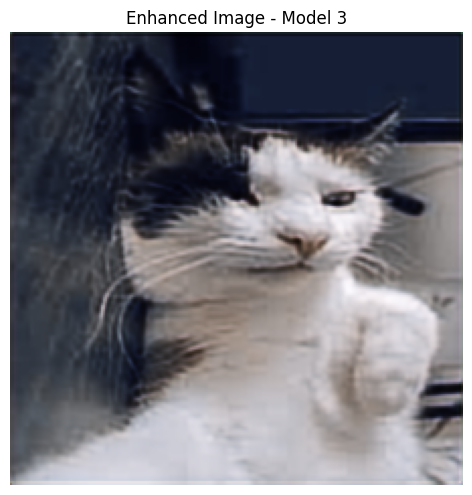

In [105]:
enhance_image('trial_3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


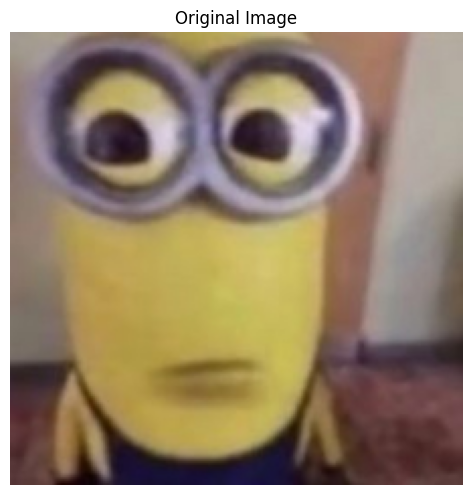

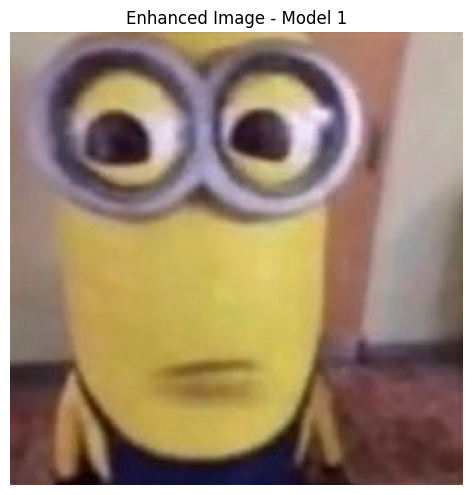

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


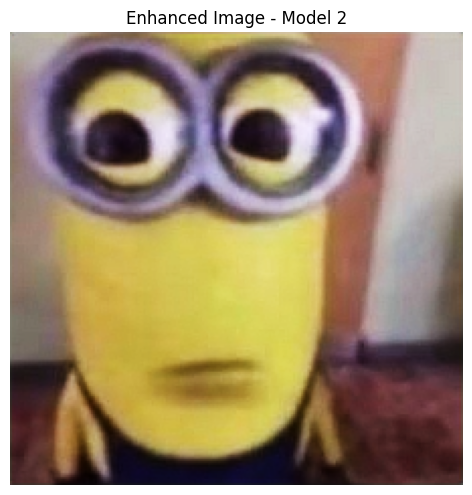

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


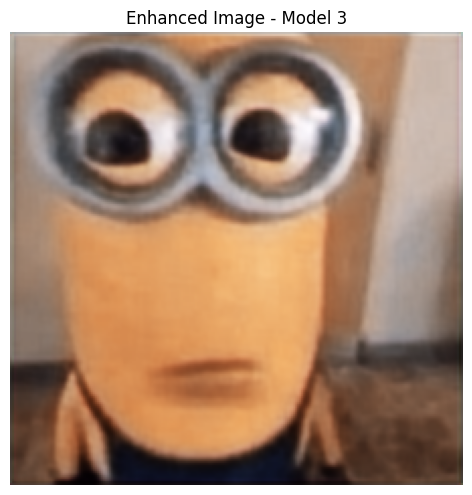

In [106]:
enhance_image('d2.jpg')